In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import fetch_california_housing



## Creamos un modelo de regresión muy simple

In [2]:
X = np.array([[1, 50], [1, 60], [1, 70]])

In [5]:
print(X)

[[ 1 50]
 [ 1 60]
 [ 1 70]]


In [7]:
y = np.array([200, 250, 300] )

In [9]:
theta = np.linalg.inv(X.T.dot(X))

In [10]:
print(theta)

[[ 1.83333333e+01 -3.00000000e-01]
 [-3.00000000e-01  5.00000000e-03]]


In [8]:
print(y)

[200 250 300]


In [ ]:
theta_f = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [ ]:
X_b = np.array([[1, 90]])

In [ ]:
X_b.dot(theta_f)[0]

400.00000000000057

In [ ]:
X.dot(theta_f)

array([200., 250., 300.])

## Ahora volvemos a hacer el ejercicio importando un dataset externo

### Primero crearemos un dataset sintético

In [11]:
# Semilla para reproducibilidad
np.random.seed(42)

# Generar datos sintéticos
n_samples = 500  # Número de muestras

# Superficie en metros cuadrados (100 a 300 m²)
surface = np.random.randint(100, 300, n_samples)

# Número de habitaciones (1 a 6 habitaciones)
num_rooms = np.random.randint(1, 7, n_samples)

# Ingreso medio del barrio en miles de euros (20k a 80k)
income_neighborhood = np.random.randint(20000, 80000, n_samples)

# Generar precio de la vivienda en función de las variables anteriores con más ruido
noise = np.random.normal(0, 50000, n_samples)  # Aumentando el ruido a 50,000
price = (surface * 3000) + (num_rooms * 5000) + (income_neighborhood * 0.2) + noise

# Crear DataFrame
housing_df = pd.DataFrame({
    'Surface_m2': surface,
    'Num_Rooms': num_rooms,
    'Income_Neighborhood': income_neighborhood,
    'Price': price
})

# Exportar dataset
housing_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/housing_data.csv', index=False)
/content/sample_data/

### Crear el modelo

In [ ]:
housing_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/housing_data.csv')

In [20]:
housing_df.head()

,Surface_m2,Num_Rooms,Income_Neighborhood,Price
0,202,5,27561,744274.176922
1,279,5,28258,901264.464221
2,192,6,36616,582180.474845
3,114,5,79500,361992.848300
4,206,3,78513,584280.231012


In [27]:
X_ = housing_df['Surface_m2']
y_ = housing_df['Price']/1000

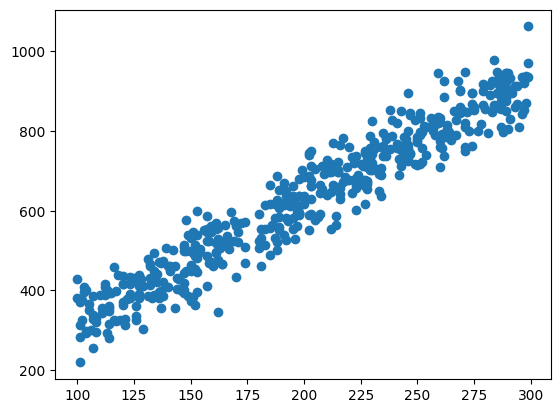

In [28]:
plt.scatter(X_, y_)
plt.show()

In [33]:
X_

,Surface_m2
0,202
1,279
2,192
3,114
4,206
...,...
495,147
496,188
497,216
498,228


In [35]:
X = np.c_[np.ones((X_.shape[0], 1)), np.array(X_)]

In [36]:
y = np.array(y_)

In [ ]:
## Ecuacion de normalización

In [37]:
theta_f = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

In [38]:
theta_f

array([17.98692873,  3.04858979])

In [ ]:
#  Prediccion

In [ ]:
np.array([[1, 200]]).dot(theta_f)

array([950.])

In [39]:
#  Dibujamos recta de regresion

x0 = 100
y0 = theta_f[1] * x0 + theta_f[0]

x1 = 300
y1 = theta_f[1] * x1 + theta_f[0]

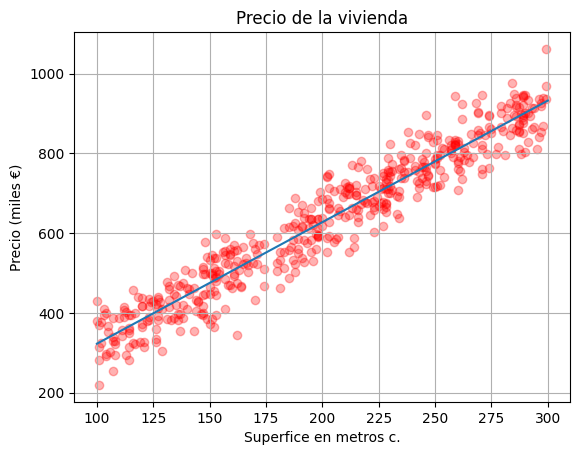

In [40]:
# Grafica de la recta

plt.plot([x0, x1], [y0, y1])
plt.scatter(X_, y_, alpha=0.3, color='red')
plt.xlabel("Superfice en metros c.")
plt.ylabel("Precio (miles €)")
plt.title("Precio de la vivienda")
# plt.legend()
plt.grid(True)
plt.show()

### Práctica sobre matriz de confusión

In [ ]:
# Creamos unos datasets de ejemplo con valores reales y predichos

In [ ]:
from copy import deepcopy
# Etiquetas reales (ground truth)
y_true = np.random.randint(0, 2, size=100)
y_pred = y_true.copy()

# Ruido en las predicciones para simular que el modelo no es exacto (10%)
noise = np.random.choice([0, 1], size=100, p=[0.9, 0.1])

y_pred = np.abs(y_pred - noise)

In [ ]:
# Ahora creamos la matriz de confusión manualmente

TP = np.sum((y_true == 1) & (y_pred == 1))  # Verdaderos positivos
TN = np.sum((y_true == 0) & (y_pred == 0))  # Verdaderos negativos
FP = np.sum((y_true == 0) & (y_pred == 1))  # Falsos positivos
FN = np.sum((y_true == 1) & (y_pred == 0))  # Falsos negativos

print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")

conf_matrix = np.array([[TN, FP],
                        [FN, TP]])

print("Matriz de confusión:")
print(conf_matrix)

TP: 46, TN: 47, FP: 2, FN: 5
Matriz de confusión:
[[47  2]
 [ 5 46]]


In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Exactitud: {accuracy:.2f}")

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
print(f"Precisión: {precision:.2f}")

recall = TP / (TP + FN) if (TP + FN) != 0 else 0
print(f"Sensibilidad: {recall:.2f}")

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1-Score: {recall:.2f}")

specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
print(f"Especificidad: {specificity:.2f}")



Exactitud: 0.93
Precisión: 0.96
Sensibilidad: 0.90
F1-Score: 0.90
Especificidad: 0.96


- Exactitud: mide qué tan bien el modelo predice correctamente en general.

- Precisión: mide cuántas de las predicciones positivas son realmente positivas.

- Sensibilidad: mide cuántos de los casos positivos reales fueron correctamente identificados.

- F1-Score: Media armónica entre precisiónn y sensibilidad.

- Especificidad: mide cuántos de los casos negativos reales fueron correctamente identificados.